In [62]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [65]:
engine = create_engine("sqlite:///mta.db")

In [66]:
all_tables = engine.table_names()
all_tables

['station_sample', 'station_sample_old']

In [67]:
overallChart = pd.read_sql('select sample_num,sum(DAILY_ENTRIES) as system_total from station_sample group by sample_num;', engine)
overallChart.shape

(15, 2)

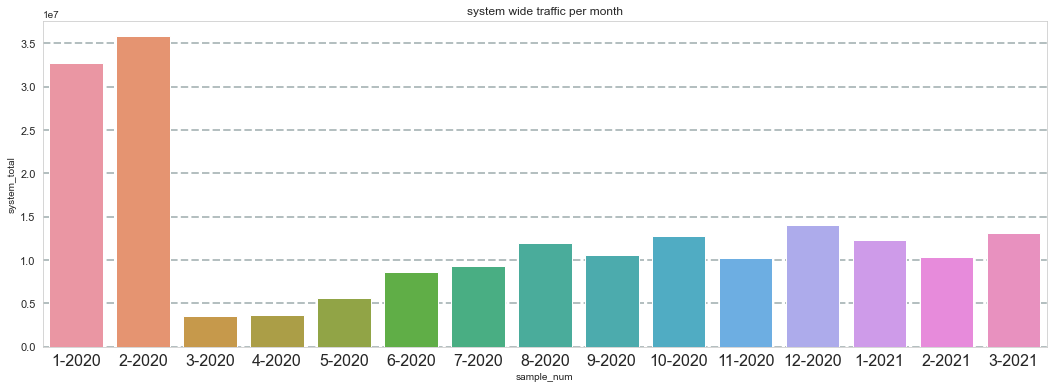

In [177]:
plt.figure(figsize=(18,6))
sns.barplot(x='sample_num', y='system_total', data=overallChart)
plt.title('system wide traffic per month')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

plt.yticks(fontsize=11);
samples=["1-2020","2-2020","3-2020","4-2020","5-2020","6-2020","7-2020","8-2020","9-2020","10-2020","11-2020","12-2020","1-2021","2-2021","3-2021"]
xticks = [i for i in range(0,15)]
plt.xticks(xticks,samples,fontsize=16);

In [96]:
sql="select unique_station,sum(DAILY_ENTRIES) as JanFeb2020 from station_sample where \
sample_num=0 or sample_num=1 group by unique_station order by JanFeb2020 DESC limit 4 ;"
busiest_precovid = pd.read_sql(sql, engine)
busiest_precovid

,unique_station,JanFeb2020
0,GRD CNTRL-42 ST_4567S,1473836.0
1,86 ST_BC,1255116.0
2,34 ST-HERALD SQ_BDFMNQRW,1250463.0
3,34 ST-PENN STA_123ACE,1192686.0


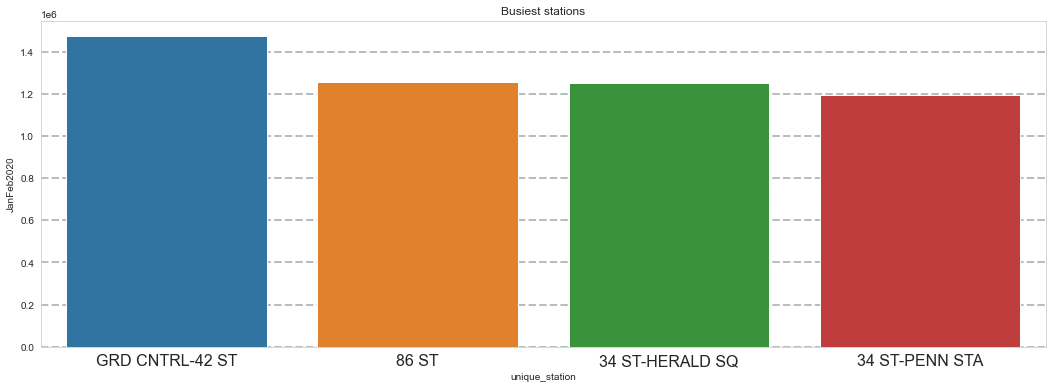

In [152]:
plt.figure(figsize=(18,6))
#plt.bar(, busiest_precovid['JanFeb2020'],color='royalblue', alpha=0.7)
sns.barplot(x="unique_station", y='JanFeb2020', data=busiest_precovid)
plt.title('Busiest stations')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
stations = [name.split("_")[0] for name in busiest_precovid['unique_station']]
xticks = [i for i in range(0,4)]
plt.xticks(xticks,stations,fontsize=16);

In [178]:
sql="select sample_num,sum(DAILY_ENTRIES) as system_total from station_sample \
where unique_station in ('GRD CNTRL-42 ST_4567S','86 ST_BC','34 ST-HERALD SQ_BDFMNQRW','34 st Penn sta') group by sample_num;"
top5_over_time = pd.read_sql(sql, engine)
top5_over_time.head(5)

,sample_num,system_total
0,0,1461974.0
1,1,2517441.0
2,2,72806.0
3,3,63088.0
4,4,103057.0


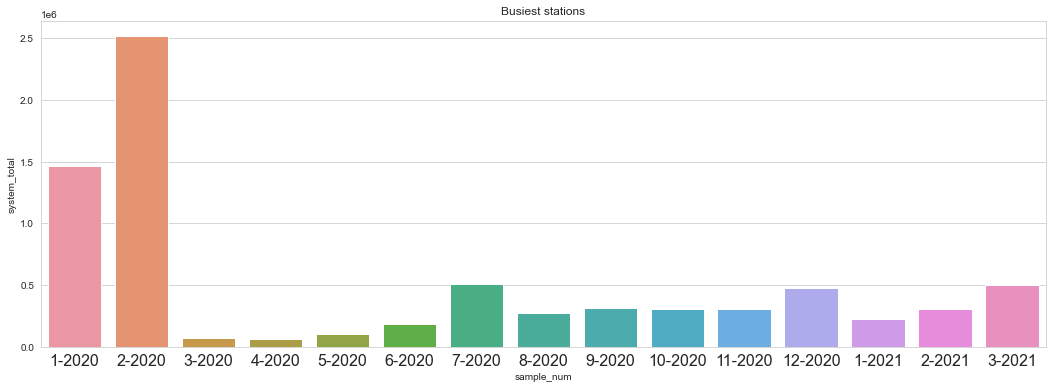

In [180]:
plt.figure(figsize=(18,6))
sns.barplot(x='sample_num', y='system_total', data=top5_over_time)
plt.title('Busiest stations')
samples=["1-2020","2-2020","3-2020","4-2020","5-2020","6-2020","7-2020","8-2020","9-2020","10-2020","11-2020","12-2020","1-2021","2-2021","3-2021"]
xticks = [i for i in range(0,15)]
plt.xticks(xticks,samples,fontsize=16);

### INDIVIDUAL STATION CHANGE

In [127]:
sql="with precovid as(\
select unique_station,avg(DAILY_ENTRIES) AS PRECOVID_AVG from station_sample where \
sample_num <2 group by unique_station ) \
, postcovid as \
(select unique_station,avg(DAILY_ENTRIES) AS POSTCOVID_AVG from station_sample where \
sample_num >1 group by unique_station ) \
select postcovid.unique_station,PRECOVID_AVG/POSTCOVID_AVG  as factor FROM precovid \
INNER JOIN postcovid ON precovid.unique_station=postcovid.unique_station \
order by factor asc;"
impact = pd.read_sql(sql, engine)
impact.head(5)

,unique_station,factor
0,AQUEDUCT N.COND_A,0.131011
1,AVENUE H_BQ,0.157744
2,AQUEDUCT RACETR_A,0.246798
3,36 ST_MR,0.442300
4,CATHEDRAL PKWY_1,0.514808


In [128]:
least_impact=impact.head(5)

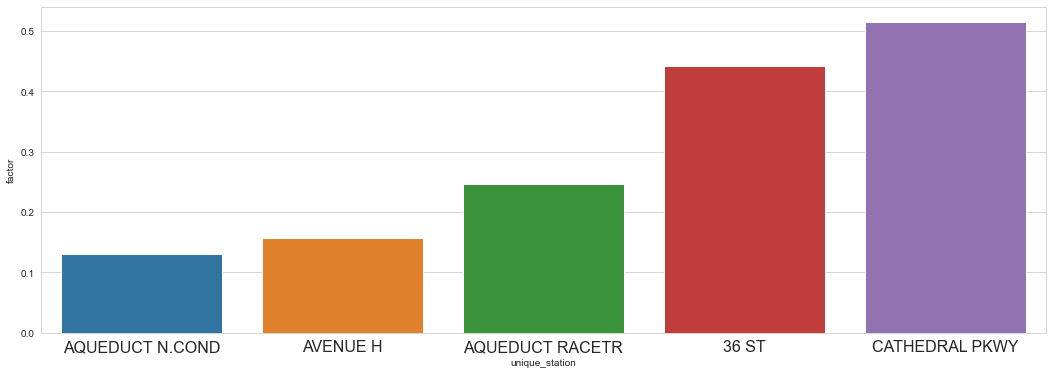

In [154]:
plt.figure(figsize=(18,6))
sns.barplot(x='unique_station', y='factor', data=least_impact)

#plt.title('Busiest stations')
stations = [name.split("_")[0] for name in least_impact['unique_station']]
xticks = [i for i in range(0,5)]
plt.xticks(xticks,stations,fontsize=16);

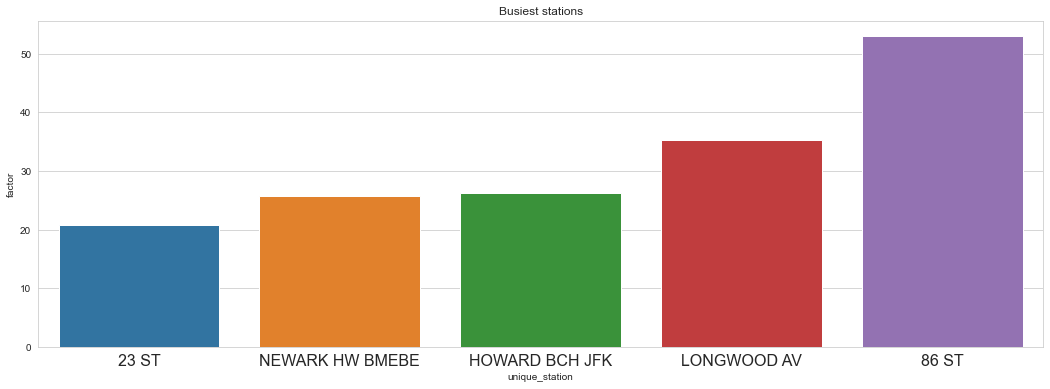

In [155]:
most_impact=impact.tail(5)
plt.figure(figsize=(18,6))
sns.barplot(x='unique_station', y='factor', data=most_impact)
plt.title('Busiest stations')
stations = [name.split("_")[0] for name in most_impact['unique_station']]
xticks = [i for i in range(0,5)]
plt.xticks(xticks,stations,fontsize=16);

In [138]:
impact.loc[13:17]

,unique_station,factor
13,67 AV_MR,0.847812
14,WOODHAVEN BLVD_JZ,0.909141
15,BAY PKWY_N,0.982402
16,BROOKLYN BRIDGE_456JZ,1.121269
17,MYRTLE-WILLOUGH_G,1.157053


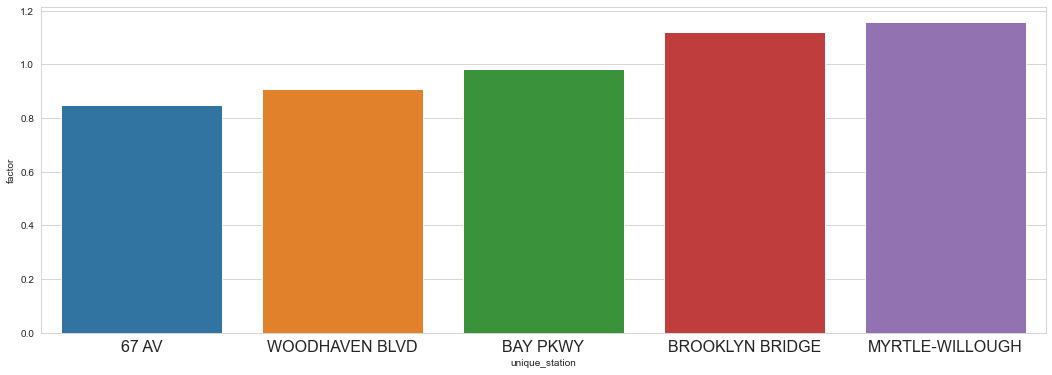

In [156]:
no_change=impact.loc[13:17]
plt.figure(figsize=(18,6))
sns.barplot(x='unique_station', y='factor', data=no_change)
#plt.title('Busiest stations')
stations = [name.split("_")[0] for name in no_change['unique_station']]
xticks = [i for i in range(0,5)]
plt.xticks(xticks,stations,fontsize=16);

In [169]:
sql="select sample_num,sum(DAILY_ENTRIES) as sample_sum from station_sample \
where unique_station in ('GRD CNTRL-42 ST_4567S') group by sample_num;"
just67 = pd.read_sql(sql, engine)
just67.head(5)

,sample_num,sample_sum
0,0,760683.0
1,1,713153.0
2,2,36251.0
3,3,29028.0
4,4,48850.0


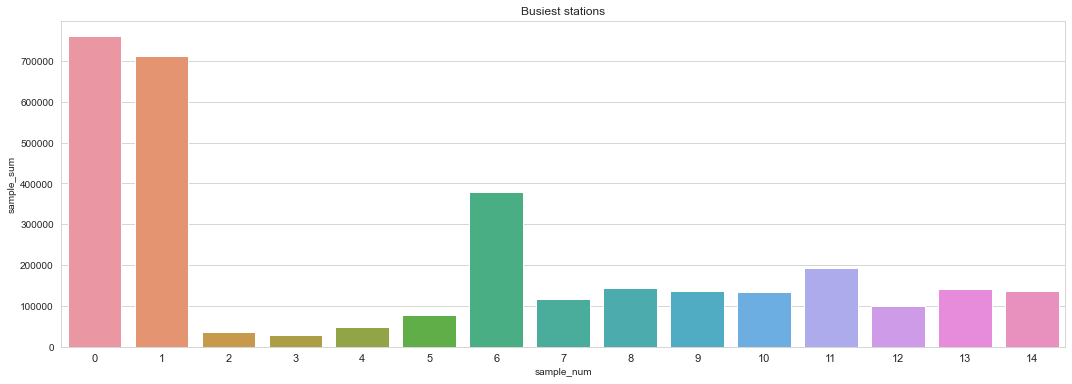

In [170]:
plt.figure(figsize=(18,6))
sns.barplot(x='sample_num', y='sample_sum', data=just67)
plt.title('Busiest stations')
plt.xticks(fontsize=11);

In [171]:
just67

,sample_num,sample_sum
0,0,760683.0
1,1,713153.0
2,2,36251.0
3,3,29028.0
4,4,48850.0
5,5,78926.0
6,6,379445.0
7,7,116832.0
8,8,145136.0
9,9,136438.0
